# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ion()
import pandas as pd

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()
#male_df =  None
#female_df =  None

  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
grouped = data.groupby(by = 'Gender')
male_df = grouped.get_group('Male')
female_df = grouped.get_group('Female')
grouped.agg(['mean', 'std'])

Height                Weight           
             mean       std        mean        std
Gender                                            
Female  63.708774  2.696284  135.860093  19.022468
Male    69.026346  2.863362  187.020621  19.781155

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

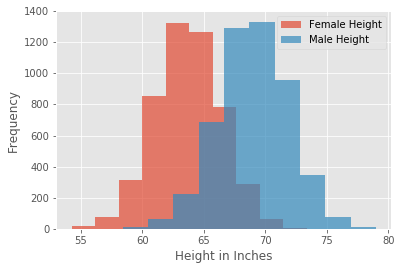

In [4]:
plt.hist(female_df.Height,10, alpha = 0.7, label = 'Female Height')
plt.hist(male_df.Height,10,alpha = 0.7, label = 'Male Height')
plt.legend()
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Record your observations - are these inline with your personal observations?
# Both heights are roughly normal in distribution with some left skew. There is a
# significant difference between the distributions such that males, in general, are
# taller than women. These are inline with my personal observations.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

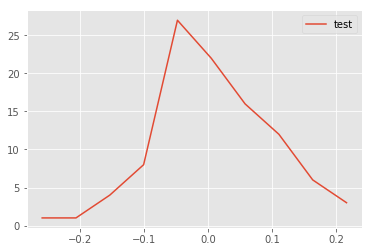

In [6]:
def density(x):
    n, bins = np.histogram(x);
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [7]:
# You code here
male_x_height, male_y_height = density(male_df.Height)
female_x_height, female_y_height = density(female_df.Height)

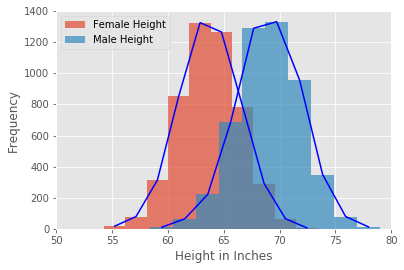

In [8]:
plt.hist(female_df.Height,10, alpha = 0.7, label = 'Female Height')
plt.hist(male_df.Height,10,alpha = 0.7, label = 'Male Height')
plt.legend()
plt.plot(male_x_height, male_y_height,'b-')
plt.plot(female_x_height, female_y_height,'b-')
plt.xlim([50,80])
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

#### Repeat above exerice for male and female weights

In [9]:
# Your code here
male_x_weight, male_y_weight = density(male_df.Weight)
female_x_weight, female_y_weight = density(female_df.Weight)

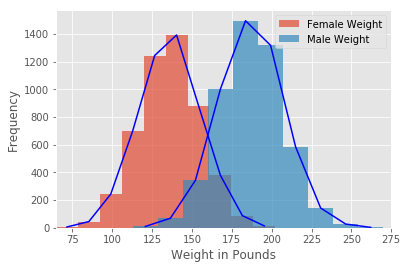

In [10]:
plt.hist(female_df.Weight,10, alpha = 0.7, label = 'Female Weight')
plt.hist(male_df.Weight,10,alpha = 0.7, label = 'Male Weight')
plt.legend()
plt.plot(male_x_weight, male_y_weight,'b-')
plt.plot(female_x_weight, female_y_weight,'b-')
plt.xlim([65,275])
plt.xlabel('Weight in Pounds')
plt.ylabel('Frequency')
plt.show()

#### Write your observations in the cell below.

In [11]:
# Record your observations - are these inline with your personal observations?
# Again, the data is mostly normal with left skew and there is a significant difference between
# the male and female weights with male weights, in general, being greater than female weights.
# Better stated, the mean and median female weight represents about the 3rd percentile of male
# weights.

# So whats the takeaway when comparing male and female heights and weights 
# The takeaway is that both datasets can be modeled by a standard distribution whose
# mean is different but whose standard deviation is roughly the same. The distribution for 
# male weights is right shifted in comparison to female weights.


#### Repeat Above experiments in seaborn and compare with your results. 

In [12]:
import seaborn as sns

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


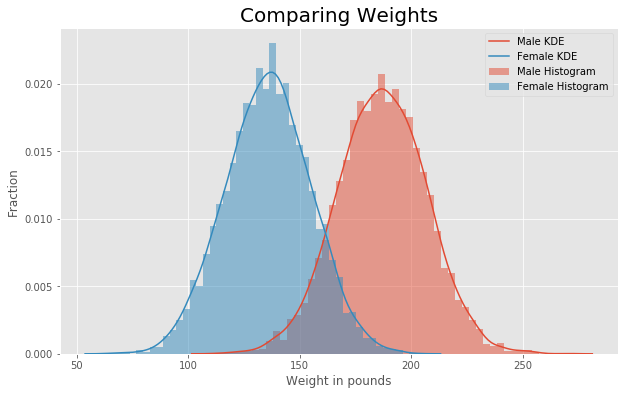

In [14]:
figure = plt.figure(figsize = (10,6))
sns.distplot(male_df.Weight,
            hist = True, hist_kws={
                                    'alpha': 0.5,
                                    "label": "Male Histogram"
                                    },
            kde = True, kde_kws = {
                                    "alpha": 1,
                                    "label": "Male KDE"
                                    }
            )
sns.distplot(female_df.Weight,
            hist = True, hist_kws={
                                    "alpha": 0.5,
                                    "label": "Female Histogram"
                                    },
            kde = True, kde_kws = {
                                    "alpha": 1,
                                    "label": "Female KDE"
                                    }
            )
plt.title("Comparing Weights",fontdict = {'fontsize':20})
plt.xlabel('Weight in pounds')
plt.ylabel('Fraction')
plt.show()


Text(0.5,1,'Comparing Weights')

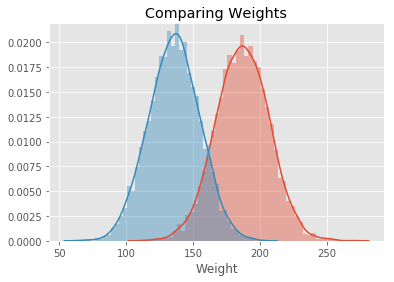

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# Using seaborn makes sense if you want to show something that seaborn does natively. 
# Since seaborn natively makes histograms with KDE overlays, it makes sense to use seaborn
# instead of doing it by hand. For some things, however, pyplot will be better because
# it will be a custom solution.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.